# ADS - Network analysis module homework

## Task (World airports).
### Q1.
Find the network connected components, report their number and the sizes.  

### Q2.
In the largest connected component find and report (print a list of city names and centrality scores) top 10 airports by each centrality metric (degree, betweenneass, closeness, pagerank with $alpha=0.85$).

### Q3.
Find maximum and average network distance of the shortest path (number of edges, regardless of size) between all pairs of the airports from the largest connected component. Visualize the shortest path of the maximum length.

### Q4.
Find average network distance among the top 100 airports by pagerank (with $alpha=0.85$) within the largest connected component

### Q5.
Partition the entire network using Combo algorithm, visualize the partition


In [1]:
#add necessary libraries
import networkx as nx #library supporting networks
import matplotlib.pyplot as plt #plotting
import pandas as pd
import numpy as np
import scipy.stats as stat
#make sure plots are embedded into the notebook
%pylab inline
import statsmodels.formula.api as smf

Populating the interactive namespace from numpy and matplotlib


In [2]:
path = 'https://raw.githubusercontent.com/CUSP-ADS2024/Data/main/'
cities = pd.read_csv(path + 'citiesTable.csv' , index_col=0 )
cities.head()

,country name,most active airport,long. most active airport,lat. most active airport,number of routes,number incoming flights,number outcoming flights,number incoming domestic flights,number outcoming domestic flights,number incoming international flights,number outcoming international flights,only domestic flights,average distance,max. distance
city name,,,,,,,,,,,,,,
London,United Kingdom,Heathrow,-0.103,51.795,1984,993,992,57,57,936,934,0,3228,11153
Chicago,United States,Chicago Ohare Intl,-87.842,42.631,1406,705,702,526,523,179,178,0,2328,12416
Paris,France,Charles De Gaulle,2.916,49.021,1254,626,629,68,68,558,560,0,3367,11652
Moscow,Russia,Domododevo,38.510,55.681,1179,589,591,231,231,358,359,0,2772,10054
Shanghai,China,Pudong,122.342,31.238,1115,560,556,357,353,203,202,0,2235,12245


In [3]:
#now read the links
links = pd.read_csv('https://raw.githubusercontent.com/CUSP-ADS2024/Data/main/citiesToCities.csv?token=GHSAT0AAAAAACMXBT22UYFOM7AYHZQZKLJ4ZPH3KEQ', index_col=None )
links.head()

,departure city,long. departure (decimal),lat. departure (decimal),departure country,arrival city,long. departure (decimal).1,lat. departure (decimal).1,arrival country,number of routes,distance
0,Sao Paulo,-46.116,-23.054,Brazil,Rio De Janeiro,-42.740,-22.682,Brazil,18,348
1,Rio De Janeiro,-42.740,-22.682,Brazil,Sao Paulo,-46.116,-23.054,Brazil,18,348
2,Beijing,116.974,40.133,China,Shanghai,122.342,31.238,China,18,1100
3,Johannesburg,28.410,-25.566,South Africa,Cape Town,19.002,-33.942,South Africa,16,1299
4,Honolulu,-157.871,21.531,United States,Tokyo,140.643,36.274,Japan,16,6103


In [4]:
#create the graph (assume connections are symmatric directionality)
Flights=nx.Graph()
Flights.add_nodes_from(cities.index)
EN=len(links.index)
edgelist=[(links['departure city'][j],links['arrival city'][j]) for j in range(EN)]
Flights.add_edges_from(edgelist)

### Q1.
Find the network connected components, report their number and the sizes.

In [5]:
cc=list(nx.connected_components(Flights))

In [6]:
len(cc)

4

In [7]:
cc

[{'Grand Rapids',
  'La Rioja',
  'Luoyang',
  'Gdansk',
  'Samana',
  'Appleton',
  'Dakhla',
  'Skiathos',
  'Muskegon',
  'Beslan',
  'Iquitos',
  'Iquique',
  'Caticlan',
  "Coff's Harbour",
  'Chattanooga',
  'Eagle',
  'Nyingchi',
  'New Stuyahok',
  'Haines',
  'Ciudad Obregon',
  'Ishigaki',
  'Sioux Lookout',
  'Kiana',
  'Tottori',
  'Roi Et',
  'The Valley',
  'Newark',
  'Wau',
  'Uberaba',
  'Miyazaki',
  'Deire Zor',
  'Pereira',
  'Armidale',
  'Puerto Carreno',
  'Kabri Dehar',
  'Allentown',
  'Borba',
  'Nantes',
  'Managua',
  'Hanoi',
  'Monbetsu',
  'Bergamo',
  'Lubumashi',
  'Muenster/osnabrueck',
  'Ua Huka',
  'Faleolo',
  'Minacu',
  'Jacksn Hole',
  'Nakhon Si Thammarat',
  'Hong Kong',
  'Dresden',
  'Sibiu',
  'Sao Nocolau Island',
  'Nadzab',
  'Atlantic City',
  'Florencia',
  'Maniitsoq',
  'Mykonos',
  'Fort Mcpherson',
  'Kardla',
  'Abakan',
  "N'djamena",
  'Juba',
  'Philadelphia',
  'Sacheon',
  'Colville Lake',
  'Malindi',
  'Kiritimati',
  'Broo

### Q2.
In the largest connected component find and report (print a list of city names and centrality scores) top 10 airports by each centrality metric (degree, betweenneass, closeness, pagerank with $alpha=0.85$).

In [8]:
max_cc = max(cc,key=len)

In [9]:
max_cc_graph = nx.Graph()
max_cc_graph.add_nodes_from(max_cc)
max_cc_graph.add_edges_from(edgelist)

In [10]:
max_cc_graph

In [11]:
#output top tn centrality scores, given the dictionary d
def topdict(d,tn):
    ind=sorted(d, key=d.get, reverse=True)
    for i in range(0,tn):
       print('{0}|{1} - {2}'.format(i+1, ind[i], d[ind[i]]))

In [12]:
mc1=dict(nx.degree(max_cc_graph))
ind1=topdict(mc1,10)

1|London - 311
2|Paris - 267
3|Frankfurt - 232
4|Moscow - 229
5|Amsterdam - 208
6|Atlanta - 208
7|Chicago - 199
8|Beijing - 184
9|Dallas-fort Worth - 181
10|Istanbul - 181


In [13]:
mc2 = nx.betweenness_centrality(max_cc_graph)
ind2=topdict(mc2,10)

1|London - 0.09034228164817266
2|Anchorage - 0.08177900060547011
3|Paris - 0.07747744448398254
4|Moscow - 0.06075222333964135
5|Chicago - 0.057862725040192346
6|Frankfurt - 0.05426812317265433
7|Seattle - 0.052472738379445105
8|Dubai - 0.046225264730113666
9|Tokyo - 0.04563994105465253
10|Toronto - 0.04510249041924881


In [14]:
mc3 = nx.closeness_centrality(max_cc_graph)
ind4=topdict(mc3,10)

1|London - 0.4223634613466614
2|Frankfurt - 0.4165055203725343
3|Paris - 0.4153998050047715
4|Amsterdam - 0.4084935977492648
5|New York - 0.3995989790885954
6|Toronto - 0.3954005059740856
7|Los Angeles - 0.3950852364676611
8|Chicago - 0.39180500848960853
9|Dubai - 0.391701766063129
10|Newark - 0.38873122442719005


In [15]:
mc4 = nx.pagerank(max_cc_graph,0.85)
ind4=topdict(mc4,10)

1|London - 0.006643690212771941
2|Moscow - 0.006394773861081004
3|Paris - 0.00628119041679376
4|Atlanta - 0.005005165152212129
5|Frankfurt - 0.004791527894478361
6|Chicago - 0.004698791227789343
7|Dallas-fort Worth - 0.004682221065566249
8|Denver - 0.004615583755208124
9|Houston - 0.004388076110471842
10|Amsterdam - 0.004302029752645577


### Q3.
Find maximum and average network distance of the shortest path (number of edges, regardless of size) between all pairs of the airports from the largest connected component. Visualize the shortest path of the maximum length.

### From the largest connected component

In [16]:
max_cc_graph

In [17]:
CityPos={c:(cities['long. most active airport'][c],cities['lat. most active airport'][c])
         for c in cities.index}

In [18]:
sp = dict(nx.shortest_path_length(max_cc_graph))

In [19]:
diameter=0; s=0; n=0;
for i in sp.items():
    for j in i[1].items():
        if j[1]>diameter:
            s += j[1]
            n += 1

print('Average distance is:', s/n)

Average distance is: 3.9398398584324226


In [20]:
diameter=0; i0=0; j0=0;
for i in sp.items():
    for j in i[1].items():
        if j[1]>diameter:
            diameter=j[1]
            i0=i[0]
            j0=j[0]
print('{0} - {1} : {2}'.format(i0,j0,diameter))

Port Hope Simpson - Koliganek : 12


In [21]:
def visualize_path(path):
    plt.figure(figsize = (12,6))
    nx.draw(max_cc_graph,pos=CityPos,with_labels=False,arrows=False,node_size=15,style='dotted',edge_color='green')
    x=[CityPos[v][0] for v in path]
    y=[CityPos[v][1] for v in path]
    plt.plot(x,y,'ro-')
    plt.plot([x[0],x[-1]],[y[0],y[-1]],'bs',markersize=10)

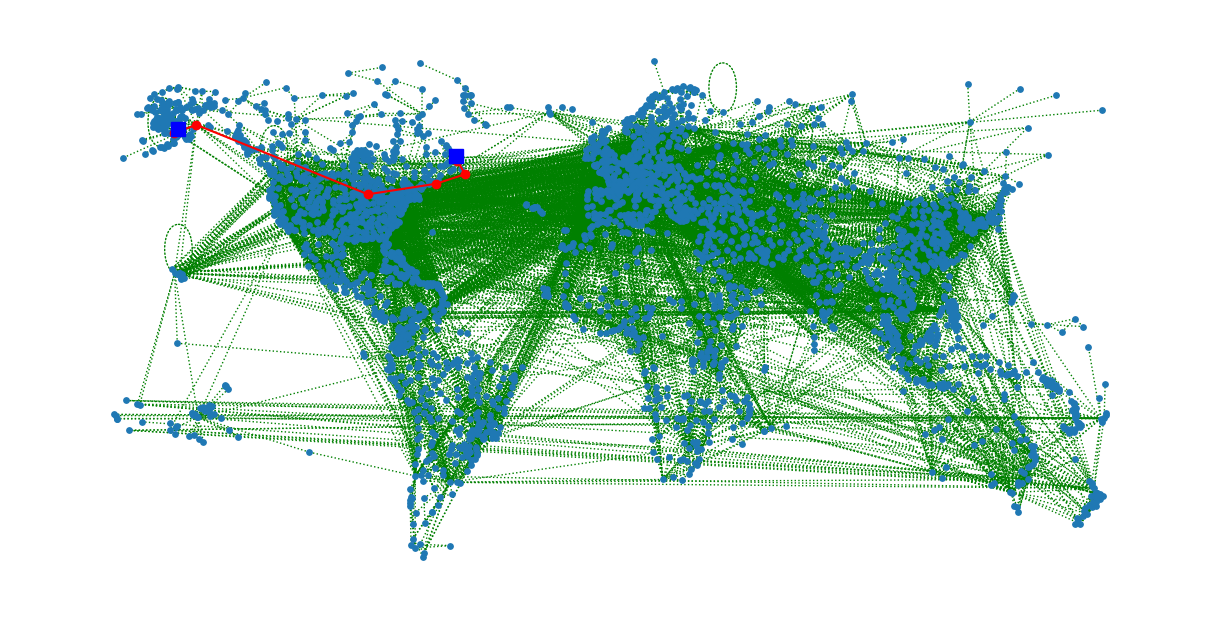

In [22]:
Lpath=nx.shortest_path(max_cc_graph,i0,j0)
visualize_path(Lpath)

### From the whole network

In [23]:
wsp = dict(nx.shortest_path_length(Flights))

In [24]:
diameter=0; s=0; n=0;
for i in wsp.items():
    for j in i[1].items():
        if j[1]>diameter:
            s += j[1]
            n += 1

print('Average distance is:', s/n)

Average distance is: 3.9398398584324226


In [25]:
diameter=0; i0=0; j0=0;
for i in wsp.items():
    for j in i[1].items():
        if j[1]>diameter:
            diameter=j[1]
            i0=i[0]
            j0=j[0]
print('{0} - {1} : {2}'.format(i0,j0,diameter))

Peawanuck - Koliganek : 12


In [26]:
def visualize_path(path):
    plt.figure(figsize = (12,6))
    nx.draw(Flights,pos=CityPos,with_labels=False,arrows=False,node_size=15,style='dotted',edge_color='green')
    x=[CityPos[v][0] for v in path]
    y=[CityPos[v][1] for v in path]
    plt.plot(x,y,'ro-')
    plt.plot([x[0],x[-1]],[y[0],y[-1]],'bs',markersize=10)

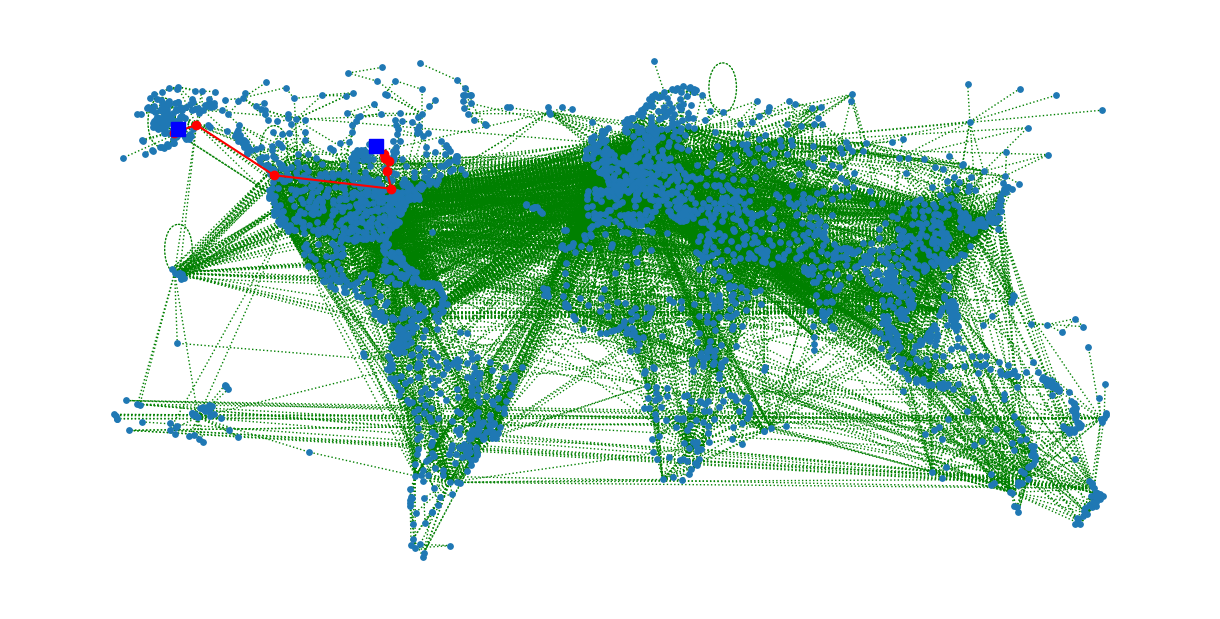

In [27]:
Lpath=nx.shortest_path(Flights,i0,j0)
visualize_path(Lpath)

### Q4.
Find average network distance among the top 100 airports by pagerank (with $alpha=0.85$) within the largest connected component

In [28]:
#output top tn centrality scores, given the dictionary d
def topdict1(d, tn):
    ind = sorted(d, key=d.get, reverse=True)  # Sort the nodes based on PageRank in descending order
    result = []
    for i in range(tn):  # Loop to collect top tn nodes
        result.append((ind[i], d[ind[i]]))  # Append the node and its PageRank score as a tuple
    # Create a DataFrame from the list of tuples
    df = pd.DataFrame(result, columns=['Node', 'PageRank'])
    return df  # Return the DataFrame


In [29]:
mc5 = nx.pagerank(max_cc_graph,0.85)
ind5=topdict1(mc5,100)
ind5

,Node,PageRank
0,London,0.006644
1,Moscow,0.006395
2,Paris,0.006281
3,Atlanta,0.005005
4,Frankfurt,0.004792
...,...,...
95,Birmingham,0.001674
96,Kiev,0.001672
97,Honiara,0.001662
98,Cancun,0.001662


In [30]:
ind5['PageRank'].mean()

0.0027938672445089975

### Q5.
Partition the entire network using Combo algorithm, visualize the partition

In [31]:
!pip install pycombo
!pip install geopandas

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 136.6/136.6 kB 2.8 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.0/235.0 kB 9.1 MB/s eta 0:00:00
  Created wheel for pycombo: filename=pycombo-0.1.7-cp310-cp310-manylinux_2_35_x86_64.whl size=208098 sha256=c2653968b45cd65e18200959573b669fc108557b1123fc6ab45483dea04a6b5a
  Stored in directory: /root/.cache/pip/wheels/21/90/69/e7f601be9740da0df241d6b15d29c7d885896dd84a8eeaeaf2
Successfully built pycombo


In [32]:
import pycombo # combo community detection package
import networkx as nx #library supporting networks
import matplotlib.pyplot as plt #plotting
import pandas as pd
import numpy as np
import scipy.stats as stat
from scipy import optimize
#make sure plots are embedded into the notebook
%pylab inline
import statsmodels.formula.api as smf
import os
from networkx.algorithms import community
import warnings
warnings.filterwarnings('ignore')

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.10/dist-packages/IPython/core/magics/pylab.py:159: UserWarning: pylab import has clobbered these variables: ['i0']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


In [33]:
PCFlights, PCFlightsMod = pycombo.execute(Flights, max_communities = 0) #keep number of communities flexible
PCFlightsMod

0.6605515045824883

In [34]:
def visualizePartition(G,partition,pos):
  N=len(G.nodes())
  s=4+4*int(log10(N))
  plt.figure(figsize=(12,6))
  PN=max(partition.values())
  my_cmap = matplotlib.cm.hsv(np.linspace(0,1,PN+1)) #create a colormap for a given number of communities
  c=[]
  for n in G.nodes():
    c.append(1.0*partition[n]/PN)
  nx.draw(G,pos=pos,with_labels=False,node_size=15,node_color=c,style='dotted',edge_color='green')

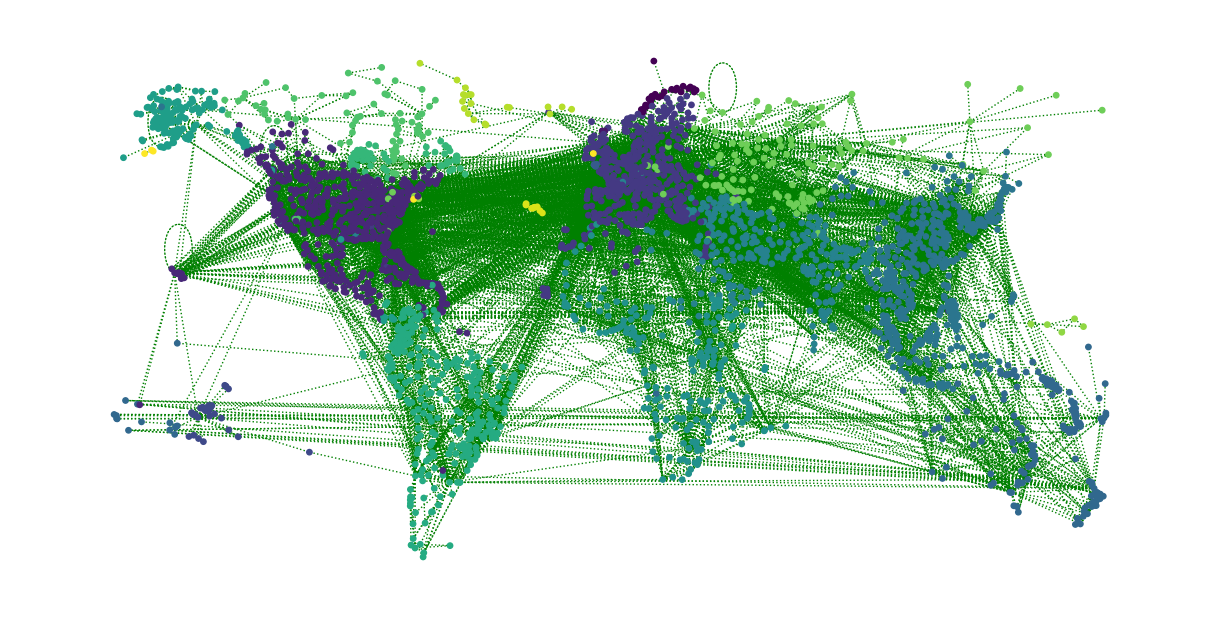

In [35]:
visualizePartition (Flights,PCFlights,CityPos)